<a href="https://colab.research.google.com/github/BEST-PK/DPDM2024/blob/main/DPDM_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ข้อสอบ
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. หาทาง visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
2. วิเคราะห์ว่าข้อมูลทั้ง 51 จุด มาจากสาร metabolites ทั้งหมดกี่กลุ่ม (ด้วย K-mean clustering และ Hierachical clustering)

# **ข้อ O preprocess ข้อมูลตามคำแนะนำ**

## **STEP O.1**

โหลดข้อมูล Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift ดังรูป

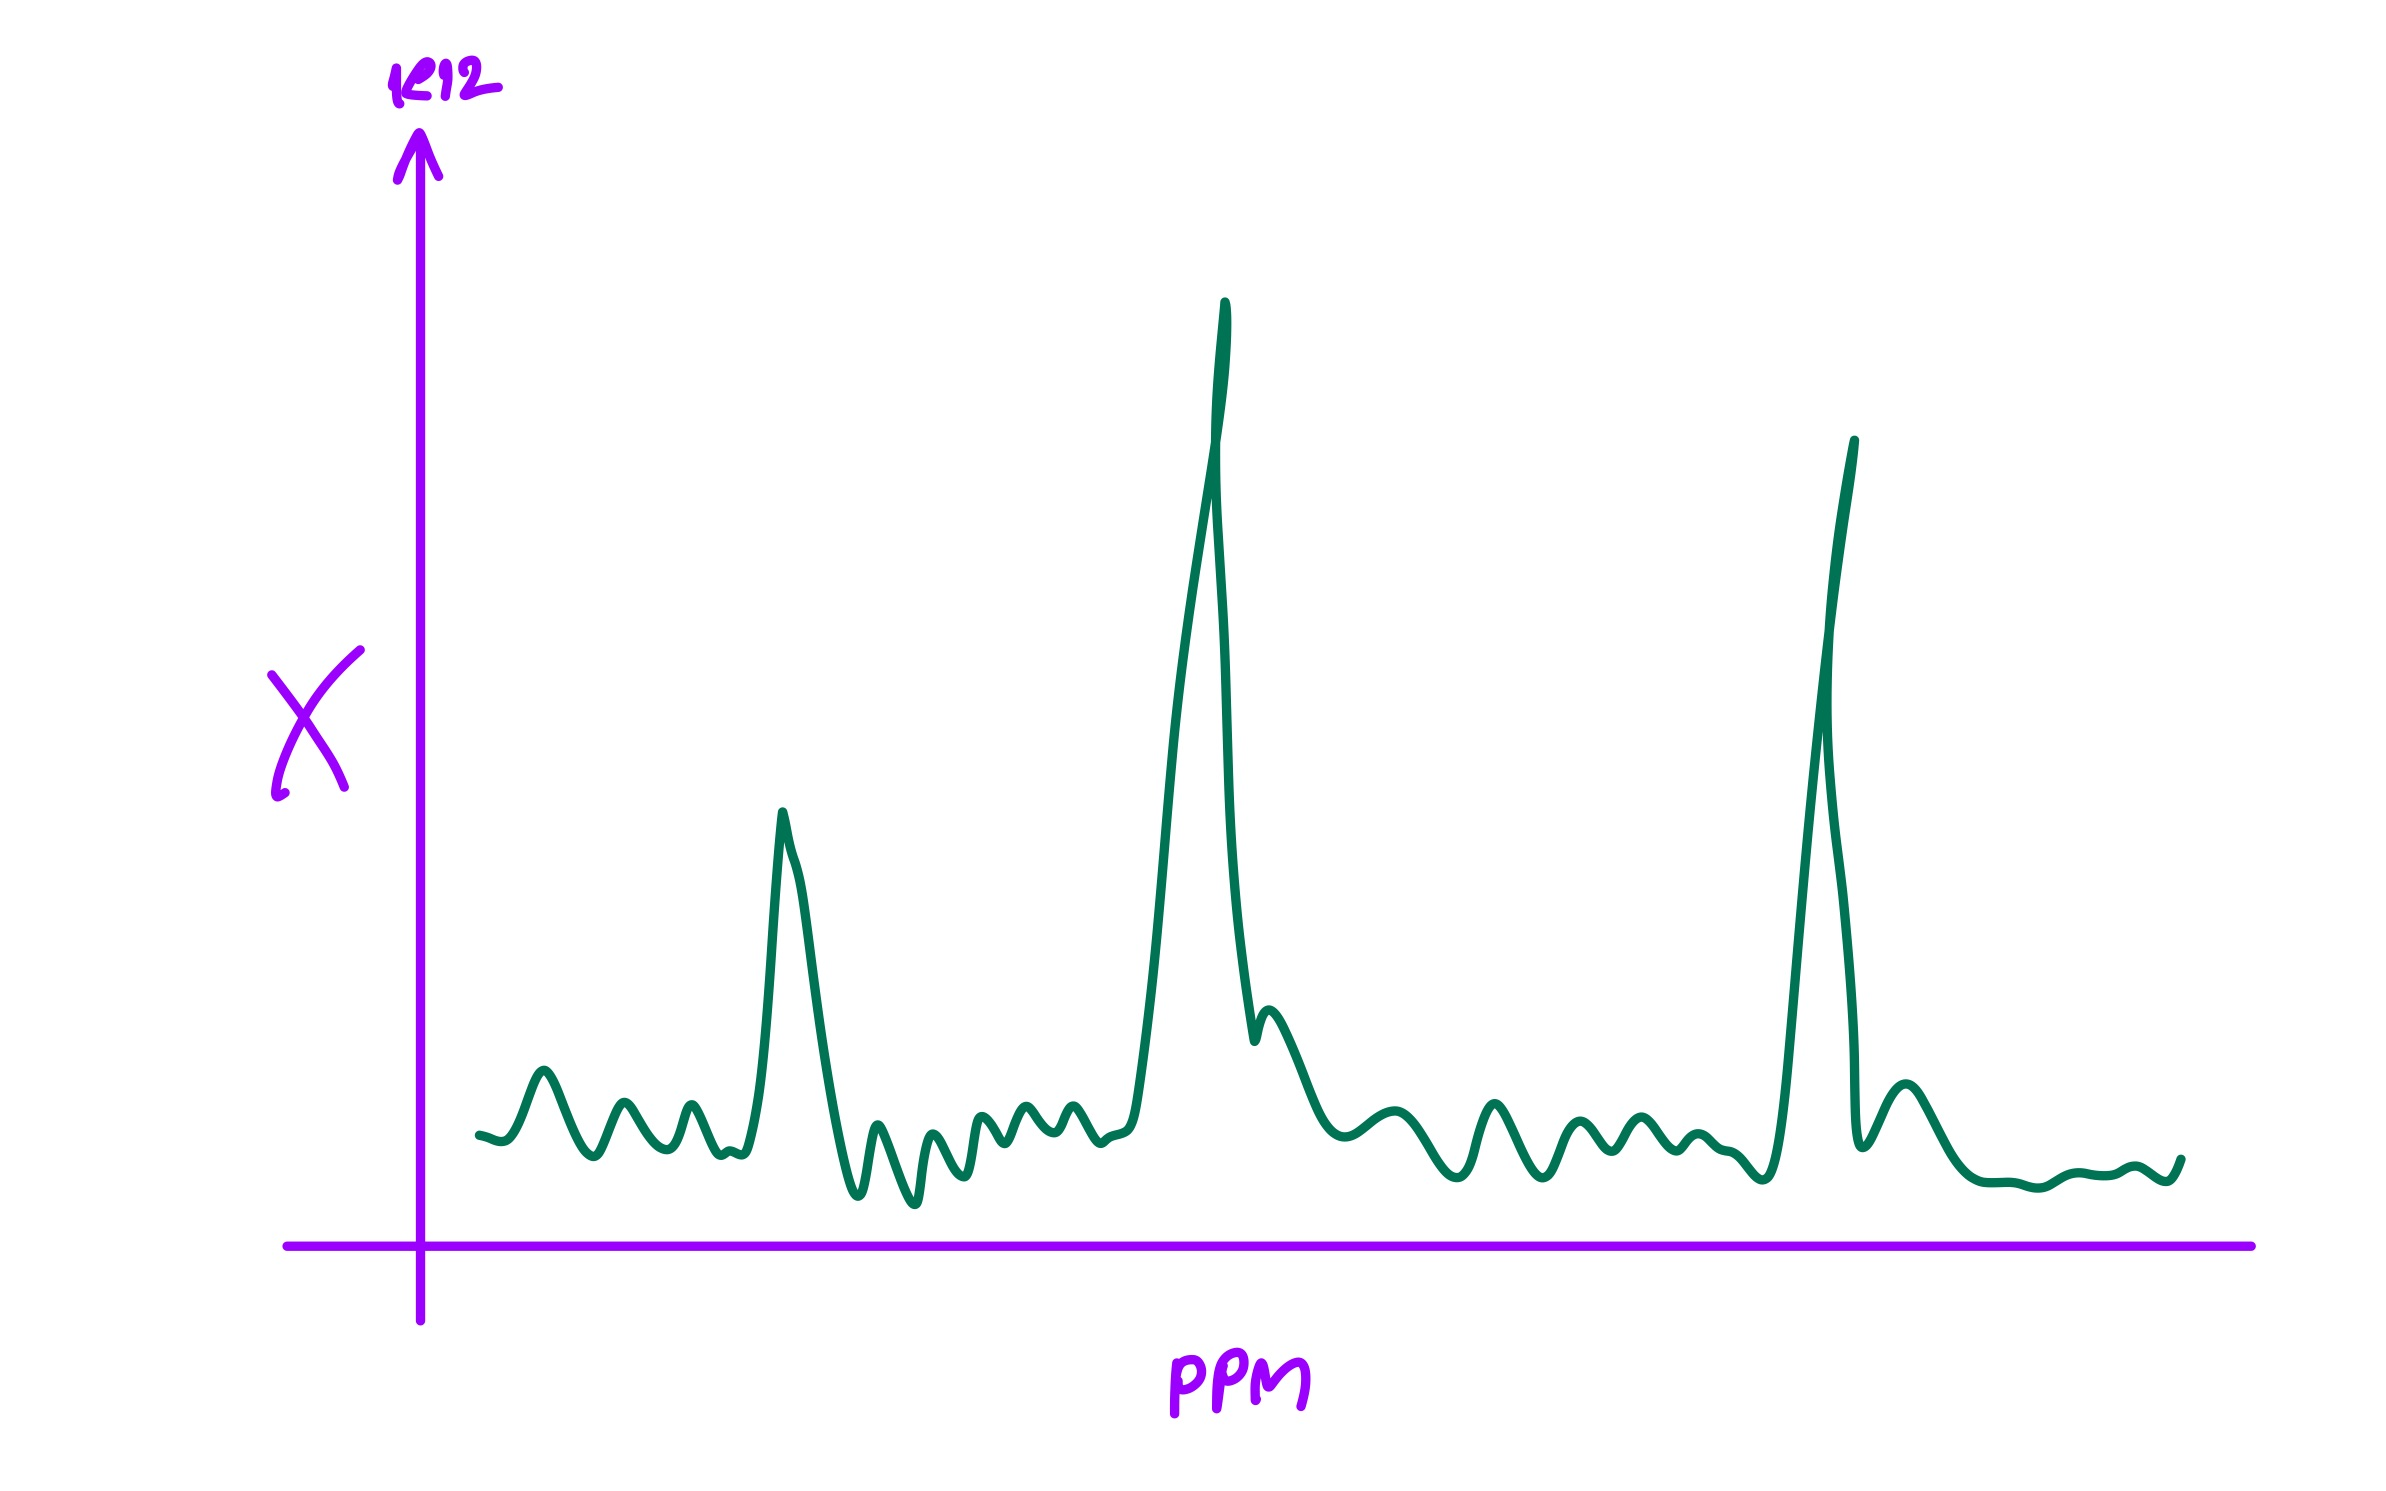

In [1]:
# prompt: นำเข้าข้อมูลจาก /content/Xnn_ppm.pickle
# prompt: Shapes of elements in Xnn_ppm

import pickle
import pandas as pd

with open('/content/Xnn_ppm.pickle', 'rb') as f:
  Xnn_ppm = pickle.load(f)
Xnn_ppm


(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
          1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
        [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
          1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
        [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
         -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
        ...,
        [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
         -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
        [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
         -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
        [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
          1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]),
 array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
        -1.26045493, -1.26064005]))

In [2]:
for element in Xnn_ppm:
  print(element.shape)

(51, 65536)
(65536,)


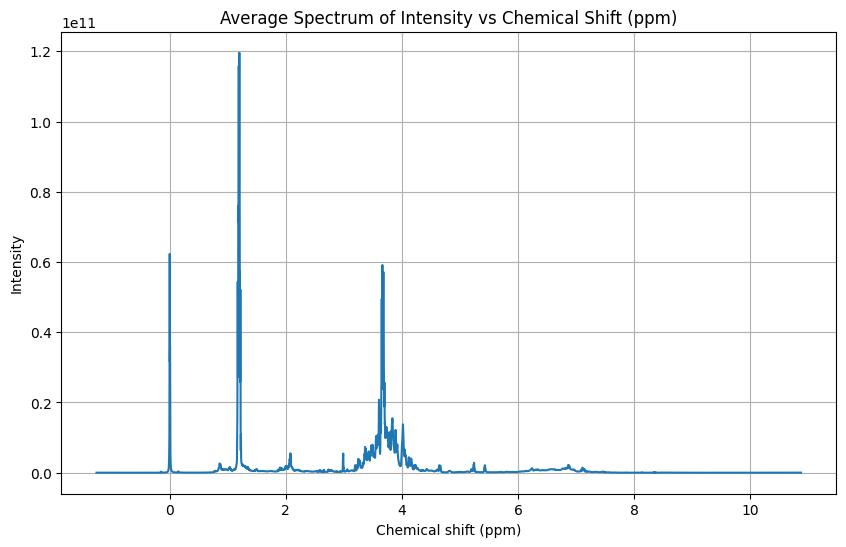

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = Xnn_ppm[0]  # Intensity values (51 samples, 65536 points each)
ppm = Xnn_ppm[1]  # Chemical shift values (65536 points)

# Averaging X across the 51 samples to get a single spectrum for plotting
X_mean = np.mean(X, axis=0)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(ppm, X_mean)
plt.xlabel('Chemical shift (ppm)')
plt.ylabel('Intensity')
plt.title('Average Spectrum of Intensity vs Chemical Shift (ppm)')
plt.grid(True)
plt.show()


## **STEP O.2**

จัดการข้อมูลโดยตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ ppm น้อยกว่า 0 และ มากกว่า 9.5

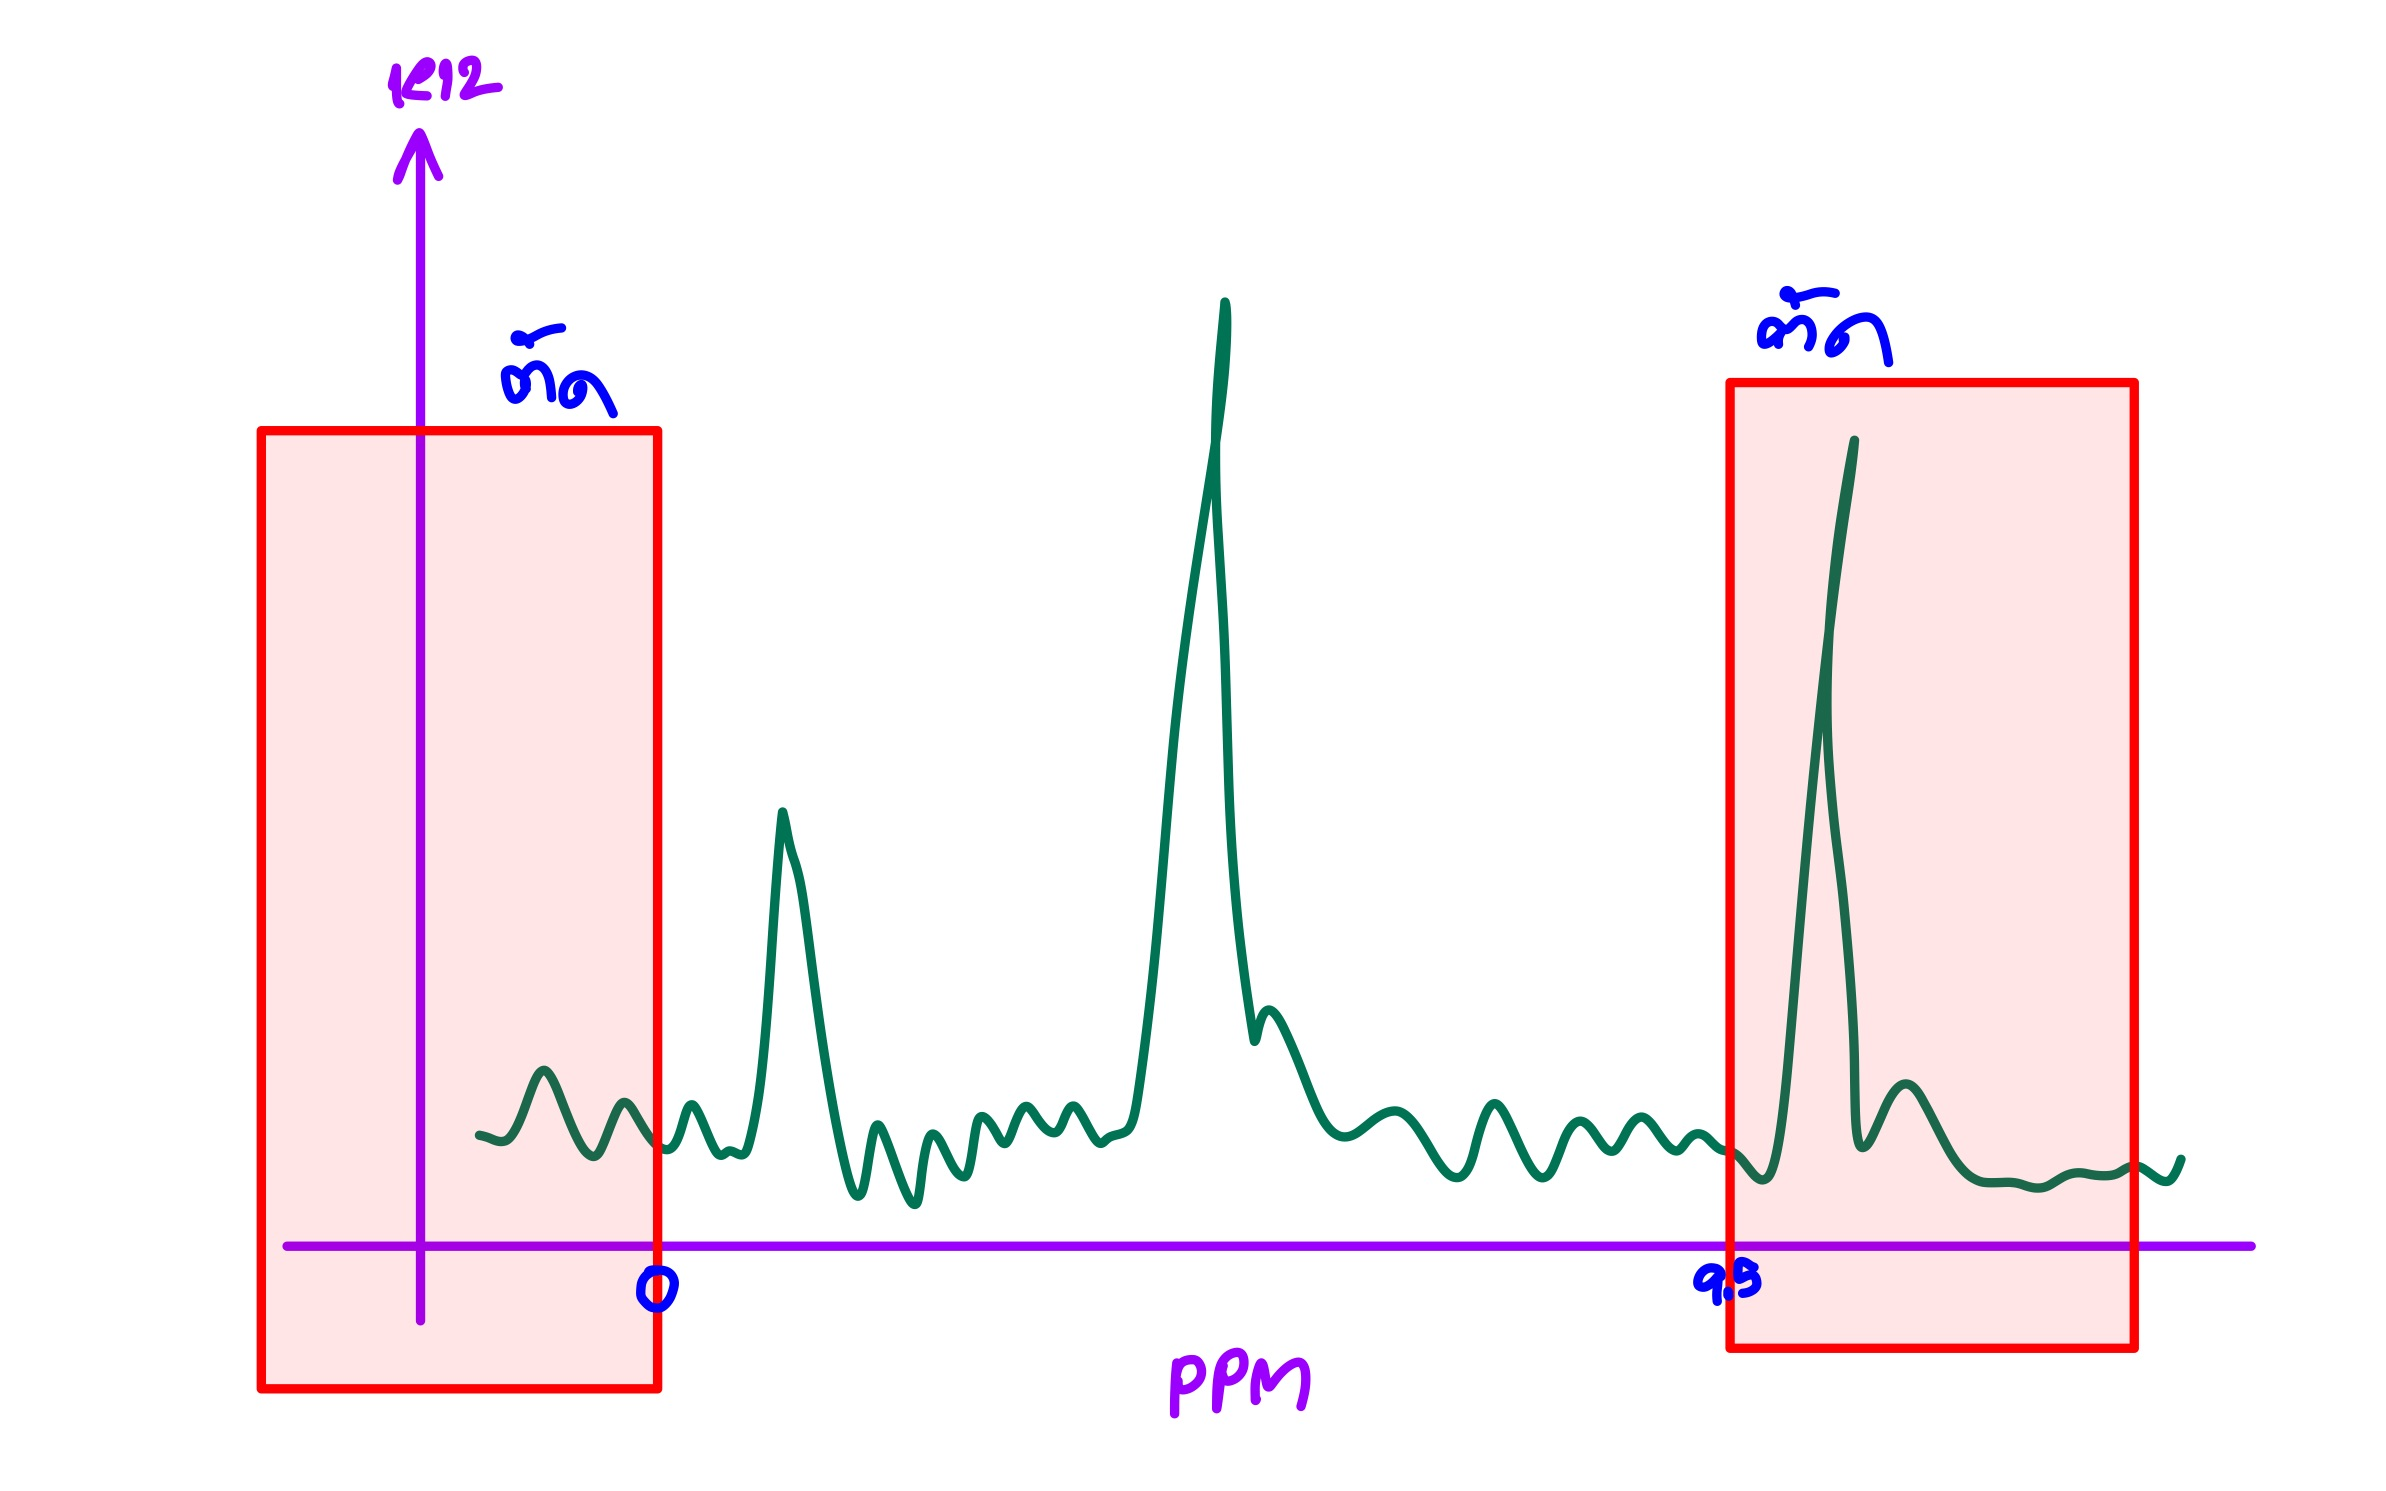

In [51]:
# prompt: df_X = pd.DataFrame(X) โดยให้ชื่อคอลลัมน์เป็น P1,P2,...,P65536
df_X = pd.DataFrame(X)
df_X = df_X.transpose()
df_X.columns = ['X{}'.format(i) for i in range(1, len(df_X.columns) + 1)]
df_X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,1.369850e+07,8.556800e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.187129e+06,5.650688e+06,...,1.507131e+06,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05
1,1.369043e+07,7.907585e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.090589e+06,5.650688e+06,...,1.507131e+06,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05
2,1.278897e+07,7.289757e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.006625e+06,5.650688e+06,...,1.507131e+06,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05
3,1.240943e+07,6.754655e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.259570e+06,5.650688e+06,...,1.507131e+06,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05
4,1.330365e+07,6.380378e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.331593e+06,5.650688e+06,...,1.507131e+06,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,-8.236795e+04,1.365760e+06,-2.396153e+06,-8.486621e+05,-2.455801e+06,-3.464025e+06,-2.484356e+06,2.988137e+05,1.817856e+06,9.486354e+05,...,2.519066e+07,-3.956485e+06,2.253845e+07,-2.986107e+06,5.795916e+07,-1.219228e+07,1.448154e+07,-4.388387e+08,-5.024345e+06,1.216790e+07
65532,6.450271e+05,1.365760e+06,-2.112734e+06,-2.302021e+05,-2.038807e+06,-3.683338e+06,-2.276858e+06,-2.857978e+05,1.817856e+06,1.331776e+06,...,2.695422e+07,6.972294e+05,2.492892e+07,-5.537723e+06,5.992379e+07,-1.471175e+07,1.321234e+07,-4.371814e+08,-3.412381e+06,1.135021e+07
65533,1.886684e+06,1.365760e+06,-2.022003e+06,-1.990586e+05,-1.716671e+06,-3.914230e+06,-2.294027e+06,-1.104571e+06,1.817856e+06,8.992346e+05,...,2.364453e+07,2.482838e+06,2.277560e+07,-9.810074e+06,6.043890e+07,-1.370238e+07,1.207972e+07,-4.376135e+08,-4.623609e+05,1.161302e+07
65534,3.117794e+06,1.365760e+06,-2.322528e+06,-2.163733e+05,-1.660351e+06,-3.960924e+06,-2.309767e+06,-1.269575e+06,1.817856e+06,-1.209883e+05,...,1.619585e+07,3.693988e+06,1.643573e+07,-1.398409e+07,6.105497e+07,-8.574341e+06,1.245650e+07,-4.380953e+08,4.276339e+05,1.160734e+07


In [52]:
# prompt: df_ppm = pd.DataFrame(ppm) ให้ชื่อคอลัมน์เป็น PPM
df_ppm = pd.DataFrame(ppm)
df_ppm.columns = ['PPM']
df_ppm

,PPM
0,10.871280
1,10.871095
2,10.870910
3,10.870725
4,10.870540
...,...
65531,-1.259900
65532,-1.260085
65533,-1.260270
65534,-1.260455


In [53]:
# prompt: เอาตาราง df_ppm มาต่อกับ df_X
df = pd.concat([df_X, df_ppm], axis=1)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X43,X44,X45,X46,X47,X48,X49,X50,X51,PPM
0,1.369850e+07,8.556800e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.187129e+06,5.650688e+06,...,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05,10.871280
1,1.369043e+07,7.907585e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.090589e+06,5.650688e+06,...,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05,10.871095
2,1.278897e+07,7.289757e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.006625e+06,5.650688e+06,...,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05,10.870910
3,1.240943e+07,6.754655e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.259570e+06,5.650688e+06,...,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05,10.870725
4,1.330365e+07,6.380378e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.331593e+06,5.650688e+06,...,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05,10.870540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,-8.236795e+04,1.365760e+06,-2.396153e+06,-8.486621e+05,-2.455801e+06,-3.464025e+06,-2.484356e+06,2.988137e+05,1.817856e+06,9.486354e+05,...,-3.956485e+06,2.253845e+07,-2.986107e+06,5.795916e+07,-1.219228e+07,1.448154e+07,-4.388387e+08,-5.024345e+06,1.216790e+07,-1.259900
65532,6.450271e+05,1.365760e+06,-2.112734e+06,-2.302021e+05,-2.038807e+06,-3.683338e+06,-2.276858e+06,-2.857978e+05,1.817856e+06,1.331776e+06,...,6.972294e+05,2.492892e+07,-5.537723e+06,5.992379e+07,-1.471175e+07,1.321234e+07,-4.371814e+08,-3.412381e+06,1.135021e+07,-1.260085
65533,1.886684e+06,1.365760e+06,-2.022003e+06,-1.990586e+05,-1.716671e+06,-3.914230e+06,-2.294027e+06,-1.104571e+06,1.817856e+06,8.992346e+05,...,2.482838e+06,2.277560e+07,-9.810074e+06,6.043890e+07,-1.370238e+07,1.207972e+07,-4.376135e+08,-4.623609e+05,1.161302e+07,-1.260270
65534,3.117794e+06,1.365760e+06,-2.322528e+06,-2.163733e+05,-1.660351e+06,-3.960924e+06,-2.309767e+06,-1.269575e+06,1.817856e+06,-1.209883e+05,...,3.693988e+06,1.643573e+07,-1.398409e+07,6.105497e+07,-8.574341e+06,1.245650e+07,-4.380953e+08,4.276339e+05,1.160734e+07,-1.260455


In [55]:
# prompt: delete row that  ppm น้อยกว่า 0 และ มากกว่า 9.5

df = df[(df['PPM'] >= 0) & (df['PPM'] <= 9.5)]
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X43,X44,X45,X46,X47,X48,X49,X50,X51,PPM
7408,-2.238253e+07,-1.588220e+07,-9.762433e+06,-1.152097e+07,-1.927329e+07,-1.988017e+07,-1.367572e+07,-1.549298e+07,-2.479188e+07,-1.193285e+07,...,-9.072824e+06,-2.718264e+07,8.450766e+06,6.824820e+06,-1.107763e+07,-8.461719e+06,-1.064183e+08,-9.067149e+06,1.785349e+07,9.499902
7409,-2.260135e+07,-1.570228e+07,-9.635796e+06,-1.159339e+07,-2.099650e+07,-1.992478e+07,-1.291794e+07,-1.545692e+07,-2.463914e+07,-1.274049e+07,...,-9.786775e+06,-2.377216e+07,8.419892e+06,5.540412e+06,-8.056375e+06,-5.620675e+06,-1.090064e+08,-8.372672e+06,1.142851e+07,9.499717
7410,-2.267760e+07,-1.537986e+07,-1.008305e+07,-1.195908e+07,-2.269406e+07,-1.942184e+07,-1.191170e+07,-1.631453e+07,-2.447632e+07,-1.408447e+07,...,-6.984165e+06,-1.382388e+07,7.703981e+06,3.399197e+06,-6.651519e+06,-4.781567e+06,-1.089453e+08,-3.065423e+06,3.830300e+06,9.499532
7411,-2.349828e+07,-1.482737e+07,-1.057019e+07,-1.241262e+07,-2.366070e+07,-1.882713e+07,-1.118082e+07,-1.752630e+07,-2.415622e+07,-1.553678e+07,...,-4.600821e+06,-1.323977e+06,5.463550e+06,1.869006e+06,-9.333215e+06,-5.963118e+06,-1.049720e+08,4.018505e+06,-4.757110e+05,9.499347
7412,-2.480870e+07,-1.378149e+07,-1.146064e+07,-1.312839e+07,-2.397809e+07,-1.801209e+07,-1.055638e+07,-1.781588e+07,-2.365328e+07,-1.638217e+07,...,-6.472428e+06,8.276753e+06,4.004620e+06,4.673788e+05,-1.481505e+07,-9.253534e+06,-9.742646e+07,7.447501e+06,-4.326780e+06,9.499161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58721,1.128203e+11,9.069517e+10,7.434140e+10,6.968615e+10,9.756285e+10,7.944997e+10,7.618053e+10,1.154259e+11,1.075667e+11,1.114016e+11,...,2.409831e+09,4.485844e+09,1.076543e+10,2.065825e+10,1.487293e+09,7.341998e+08,1.895269e+10,9.837356e+08,1.324350e+10,0.000776
58722,1.190349e+11,9.436802e+10,7.688202e+10,7.123941e+10,1.017397e+11,8.123742e+10,7.808825e+10,1.198016e+11,1.127957e+11,1.164055e+11,...,2.352254e+09,4.345594e+09,1.027581e+10,1.876368e+10,1.439568e+09,7.106767e+08,1.776680e+10,9.568173e+08,1.247164e+10,0.000591
58723,1.239041e+11,9.723589e+10,7.892382e+10,7.242124e+10,1.049403e+11,8.259823e+10,7.952851e+10,1.232555e+11,1.168865e+11,1.202236e+11,...,2.297337e+09,4.211624e+09,9.817499e+09,1.710433e+10,1.391813e+09,6.893628e+08,1.672004e+10,9.340124e+08,1.177697e+10,0.000406
58724,1.270392e+11,9.914259e+10,8.037480e+10,7.319850e+10,1.069632e+11,8.348879e+10,8.047114e+10,1.256714e+11,1.195929e+11,1.227010e+11,...,2.245036e+09,4.081732e+09,9.391262e+09,1.566929e+10,1.345245e+09,6.709736e+08,1.579794e+10,9.137152e+08,1.114885e+10,0.000221


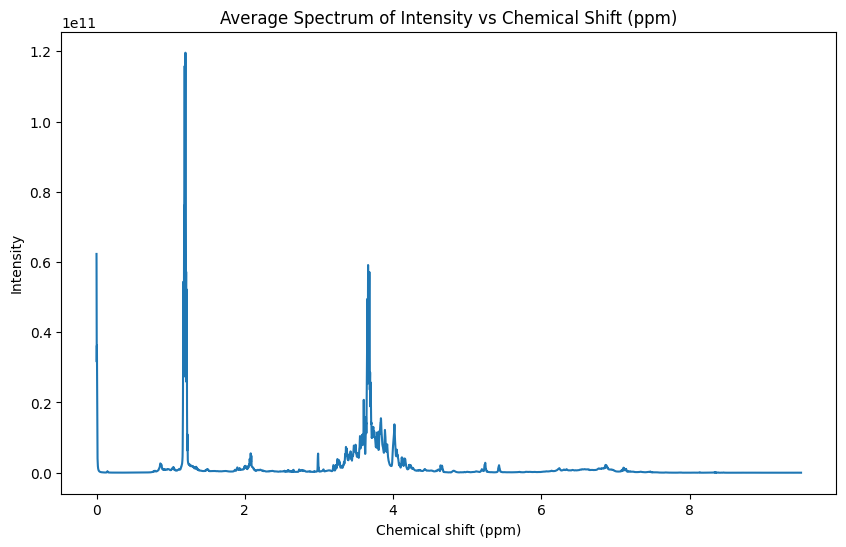

In [56]:
# prompt: # Averaging X across the 51 PCA to get a single spectrum for plotting

# Averaging X across the 51 PCA to get a single spectrum for plotting
average_intensity_per_ppm = df.groupby('PPM').mean()

# Plot the average spectrum
plt.figure(figsize=(10, 6))
plt.plot(average_intensity_per_ppm.index, average_intensity_per_ppm.mean(axis=1))
plt.xlabel('Chemical shift (ppm)')
plt.ylabel('Intensity')
plt.title('Average Spectrum of Intensity vs Chemical Shift (ppm)')
plt.show()

## **STEP O.3**

quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X

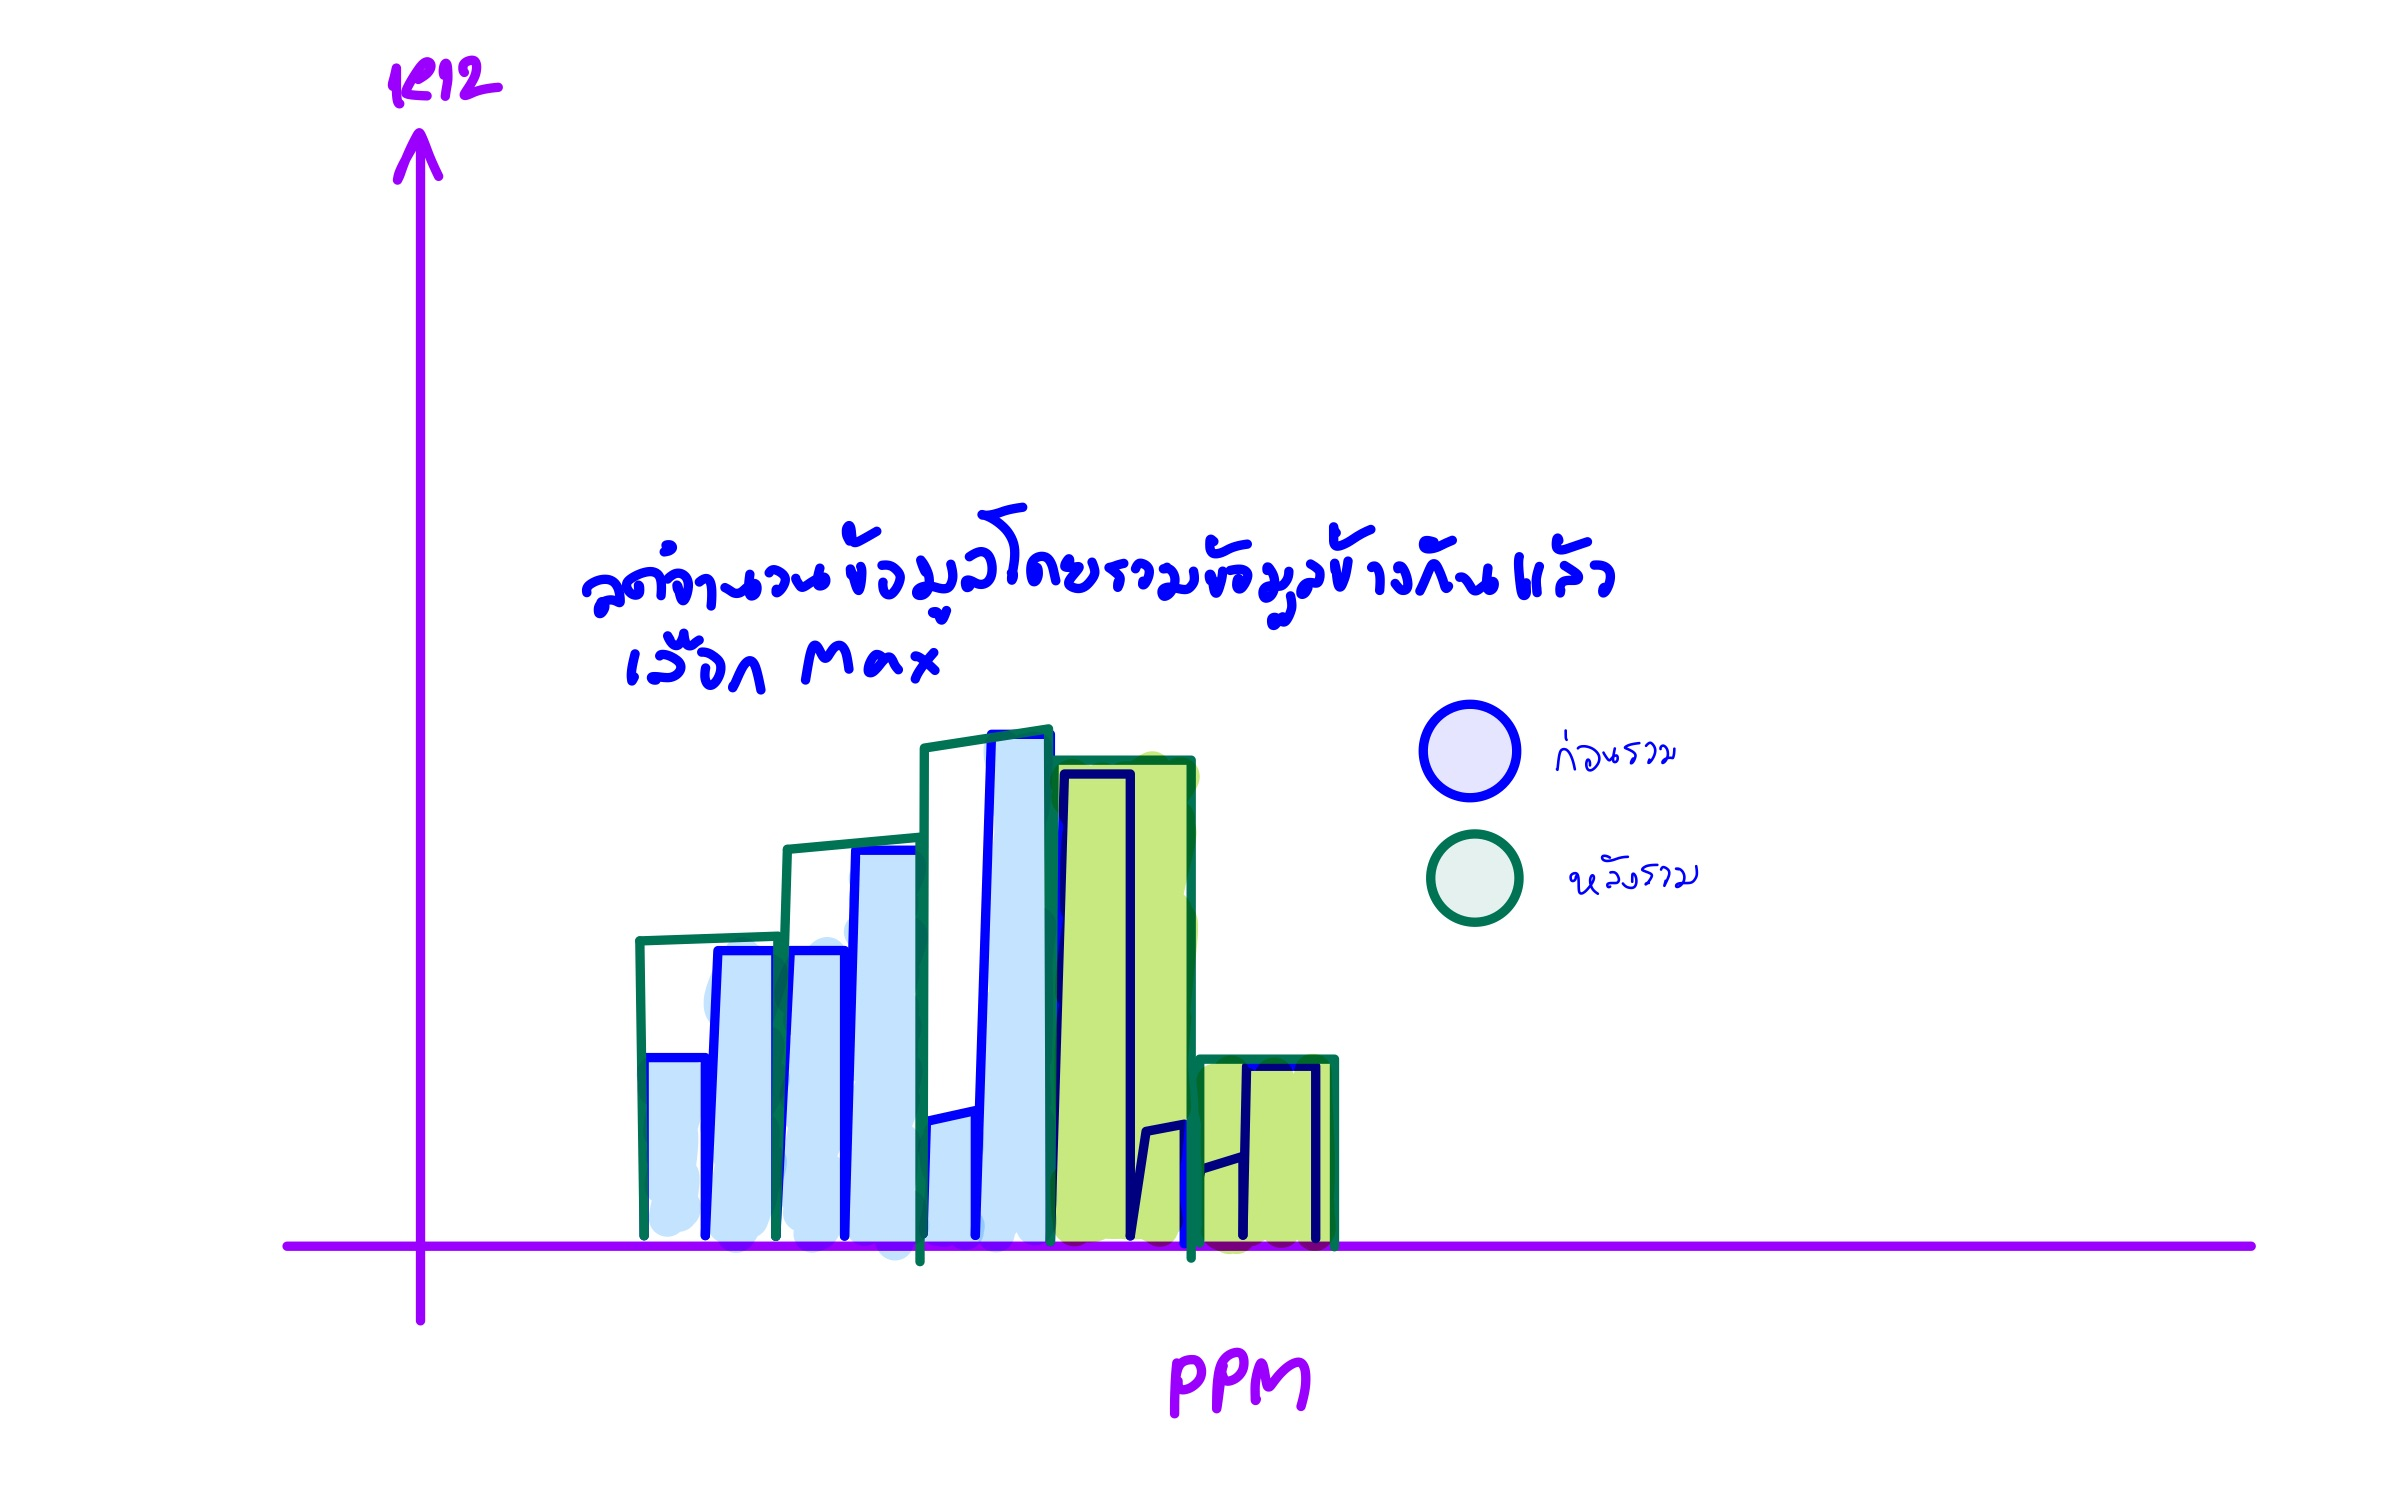

In [57]:
# prompt: quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 400 rows × 52 columns โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def quantize_data(df, rows=400, cols=52):
  """
  Quantizes data by reducing the number of rows and columns, taking the maximum value within each quantized area.

  Args:
    df: pandas DataFrame.
    rows: Desired number of rows after quantization.
    cols: Desired number of columns after quantization.

  Returns:
    A quantized pandas DataFrame.
  """

  original_rows, original_cols = df.shape

  row_step = original_rows // rows
  col_step = original_cols // cols

  quantized_df = pd.DataFrame()

  for row_start in range(0, original_rows, row_step):
      for col_start in range(0, original_cols, col_step):
          row_end = min(row_start + row_step, original_rows)
          col_end = min(col_start + col_step, original_cols)

          subset = df.iloc[row_start:row_end, col_start:col_end]
          max_value = subset.max().max()

          quantized_df.loc[row_start // row_step, col_start // col_step] = max_value

  return quantized_df


# Example usage: assuming you have a DataFrame named 'df'

# quantized_df = quantize_data(df, rows=400, cols=52)
quantized_df = quantize_data(df, rows=400, cols=52)
df_final = quantized_df

# Rename columns
new_column_names = ['X' + str(i) for i in range(1, 52)] + ['PPM']
df_final.columns = new_column_names

df_final


# Example usage: assuming you have a DataFrame named 'df'

# quantized_df = quantize_data(df, rows=400, cols=52)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X43,X44,X45,X46,X47,X48,X49,X50,X51,PPM
0,-1.096616e+07,-9.802330e+06,-7.891979e+06,-7.319846e+06,-1.899300e+07,-1.089310e+07,-6.293462e+06,-1.134961e+07,-1.475928e+07,-1.001129e+07,...,6.999172e+06,2.908260e+07,2.443103e+07,6.824820e+06,2.388436e+07,3.626020e+07,-6.399384e+07,5.209206e+07,2.531532e+07,9.499902
1,-1.478194e+07,-1.125639e+07,-7.546520e+06,-8.236147e+06,-1.601734e+07,-1.405718e+07,-3.717332e+06,-9.987656e+06,-1.571674e+07,-8.143872e+06,...,3.479218e+07,2.923394e+07,3.344648e+07,1.677978e+07,3.079201e+07,3.617994e+07,-5.329643e+07,8.960351e+07,3.602215e+07,9.476206
2,-1.325201e+07,-1.111794e+07,-6.891974e+06,-7.566969e+06,-1.808152e+07,-1.268760e+07,-6.790378e+06,-1.038291e+07,-1.761537e+07,-8.285980e+06,...,4.919746e+07,2.445689e+07,2.829451e+07,1.652562e+07,1.934488e+07,2.941777e+07,-6.016708e+07,2.186131e+08,2.399856e+07,9.452511
3,-1.491779e+07,-1.378155e+07,-8.244647e+06,-7.430431e+06,-1.914802e+07,-1.087431e+07,-7.090458e+06,-1.039890e+07,-1.438390e+07,-7.780002e+06,...,2.967404e+07,3.128081e+07,2.421363e+07,1.391643e+07,2.520191e+07,2.274357e+07,-5.427585e+07,6.361302e+07,3.346296e+07,9.428815
4,-1.416631e+07,-1.119268e+07,-7.304242e+06,-6.280961e+06,-1.850795e+07,-1.295841e+07,-7.036174e+06,-9.458504e+06,-1.434613e+07,-8.679798e+06,...,1.486051e+07,4.336627e+07,2.522088e+07,2.526235e+07,8.843688e+06,2.529235e+07,-6.767673e+07,4.592786e+07,3.259862e+07,9.405120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,8.609494e+07,8.558590e+07,1.011611e+08,9.030270e+07,8.912134e+07,9.493059e+07,9.193930e+07,8.298775e+07,8.438956e+07,8.128634e+07,...,8.106685e+07,4.862434e+07,9.257835e+07,1.028298e+08,7.446246e+07,5.882020e+07,-2.226240e+08,3.608615e+07,9.031287e+07,0.116477
397,1.459392e+08,1.417958e+08,1.648367e+08,1.465275e+08,1.438917e+08,1.577427e+08,1.562784e+08,1.243400e+08,1.451770e+08,1.339344e+08,...,1.162736e+08,8.286968e+07,1.581817e+08,1.459479e+08,9.935763e+07,7.643587e+07,-2.707799e+08,4.135221e+07,1.324039e+08,0.092781
398,2.848164e+08,3.013009e+08,3.386480e+08,3.176562e+08,2.960488e+08,3.329954e+08,3.203184e+08,2.552356e+08,2.907974e+08,2.743343e+08,...,1.741960e+08,1.684693e+08,3.194783e+08,2.554224e+08,1.395072e+08,1.148799e+08,-2.612799e+08,6.657198e+07,2.583556e+08,0.069086
399,1.119722e+09,1.181197e+09,1.358299e+09,1.313524e+09,1.178441e+09,1.334670e+09,1.274201e+09,9.776182e+08,1.122768e+09,1.094653e+09,...,6.034796e+08,8.358085e+08,1.856023e+09,1.500287e+09,4.375431e+08,2.301732e+08,4.380977e+08,2.806332e+08,1.516108e+09,0.045390


# **ข้อ 1 หาทาง visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น**

In [58]:
df_final

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X43,X44,X45,X46,X47,X48,X49,X50,X51,PPM
0,-1.096616e+07,-9.802330e+06,-7.891979e+06,-7.319846e+06,-1.899300e+07,-1.089310e+07,-6.293462e+06,-1.134961e+07,-1.475928e+07,-1.001129e+07,...,6.999172e+06,2.908260e+07,2.443103e+07,6.824820e+06,2.388436e+07,3.626020e+07,-6.399384e+07,5.209206e+07,2.531532e+07,9.499902
1,-1.478194e+07,-1.125639e+07,-7.546520e+06,-8.236147e+06,-1.601734e+07,-1.405718e+07,-3.717332e+06,-9.987656e+06,-1.571674e+07,-8.143872e+06,...,3.479218e+07,2.923394e+07,3.344648e+07,1.677978e+07,3.079201e+07,3.617994e+07,-5.329643e+07,8.960351e+07,3.602215e+07,9.476206
2,-1.325201e+07,-1.111794e+07,-6.891974e+06,-7.566969e+06,-1.808152e+07,-1.268760e+07,-6.790378e+06,-1.038291e+07,-1.761537e+07,-8.285980e+06,...,4.919746e+07,2.445689e+07,2.829451e+07,1.652562e+07,1.934488e+07,2.941777e+07,-6.016708e+07,2.186131e+08,2.399856e+07,9.452511
3,-1.491779e+07,-1.378155e+07,-8.244647e+06,-7.430431e+06,-1.914802e+07,-1.087431e+07,-7.090458e+06,-1.039890e+07,-1.438390e+07,-7.780002e+06,...,2.967404e+07,3.128081e+07,2.421363e+07,1.391643e+07,2.520191e+07,2.274357e+07,-5.427585e+07,6.361302e+07,3.346296e+07,9.428815
4,-1.416631e+07,-1.119268e+07,-7.304242e+06,-6.280961e+06,-1.850795e+07,-1.295841e+07,-7.036174e+06,-9.458504e+06,-1.434613e+07,-8.679798e+06,...,1.486051e+07,4.336627e+07,2.522088e+07,2.526235e+07,8.843688e+06,2.529235e+07,-6.767673e+07,4.592786e+07,3.259862e+07,9.405120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,8.609494e+07,8.558590e+07,1.011611e+08,9.030270e+07,8.912134e+07,9.493059e+07,9.193930e+07,8.298775e+07,8.438956e+07,8.128634e+07,...,8.106685e+07,4.862434e+07,9.257835e+07,1.028298e+08,7.446246e+07,5.882020e+07,-2.226240e+08,3.608615e+07,9.031287e+07,0.116477
397,1.459392e+08,1.417958e+08,1.648367e+08,1.465275e+08,1.438917e+08,1.577427e+08,1.562784e+08,1.243400e+08,1.451770e+08,1.339344e+08,...,1.162736e+08,8.286968e+07,1.581817e+08,1.459479e+08,9.935763e+07,7.643587e+07,-2.707799e+08,4.135221e+07,1.324039e+08,0.092781
398,2.848164e+08,3.013009e+08,3.386480e+08,3.176562e+08,2.960488e+08,3.329954e+08,3.203184e+08,2.552356e+08,2.907974e+08,2.743343e+08,...,1.741960e+08,1.684693e+08,3.194783e+08,2.554224e+08,1.395072e+08,1.148799e+08,-2.612799e+08,6.657198e+07,2.583556e+08,0.069086
399,1.119722e+09,1.181197e+09,1.358299e+09,1.313524e+09,1.178441e+09,1.334670e+09,1.274201e+09,9.776182e+08,1.122768e+09,1.094653e+09,...,6.034796e+08,8.358085e+08,1.856023e+09,1.500287e+09,4.375431e+08,2.301732e+08,4.380977e+08,2.806332e+08,1.516108e+09,0.045390


In [59]:
df_final.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X43,X44,X45,X46,X47,X48,X49,X50,X51,PPM
count,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,...,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,401.000000
mean,1.411175e+09,1.197968e+09,9.226013e+08,8.644317e+08,1.573174e+09,1.158232e+09,9.176198e+08,1.246629e+09,1.281391e+09,1.059467e+09,...,7.752451e+09,7.899516e+09,7.474285e+09,1.872509e+10,9.507561e+09,8.512912e+09,1.161107e+10,4.953789e+09,1.021247e+10,4.760798
std,7.937804e+09,6.768176e+09,5.118870e+09,4.644244e+09,7.008761e+09,5.315062e+09,5.052025e+09,7.866908e+09,7.150393e+09,6.991800e+09,...,5.491109e+10,5.048576e+10,4.779753e+10,1.179826e+11,4.851511e+10,5.241083e+10,7.500444e+10,2.159346e+10,7.463339e+10,2.746381
min,-2.064336e+07,-1.881550e+07,-1.125452e+07,-1.282324e+07,-2.441996e+07,-2.146829e+07,-1.346594e+07,-1.729841e+07,-2.303861e+07,-1.594049e+07,...,4.841864e+06,1.874248e+07,1.642266e+07,4.766457e+06,1.876842e+06,4.824959e+06,-3.163588e+08,-1.095181e+05,1.990489e+07,0.021695
25%,2.259307e+07,1.892169e+07,1.296589e+07,1.142228e+07,1.662115e+07,2.031202e+07,1.191167e+07,2.000654e+07,2.157655e+07,2.031238e+07,...,9.053988e+07,8.286968e+07,1.811375e+08,2.290963e+08,1.537657e+08,1.222280e+08,-2.003460e+07,1.193150e+08,1.324039e+08,2.391247
50%,1.515961e+08,1.345479e+08,7.472661e+07,7.196517e+07,1.438917e+08,1.236997e+08,7.398819e+07,1.324902e+08,1.621958e+08,1.299554e+08,...,3.491224e+08,3.463018e+08,8.120609e+08,1.500125e+09,7.449350e+08,5.474699e+08,6.655987e+08,3.598936e+08,6.442298e+08,4.760798
75%,5.415674e+08,4.335536e+08,1.738737e+08,1.724519e+08,4.404536e+08,4.861370e+08,1.826578e+08,3.781867e+08,5.927919e+08,3.750673e+08,...,1.462485e+09,1.178163e+09,2.329170e+09,4.441159e+09,2.791883e+09,2.057444e+09,3.035324e+09,1.634366e+09,2.274056e+09,7.130350
max,1.281687e+11,9.997906e+10,8.116507e+10,7.354861e+10,1.076736e+11,8.387254e+10,8.089926e+10,1.269488e+11,1.207425e+11,1.237594e+11,...,7.727312e+11,7.731649e+11,7.258787e+11,1.740354e+12,7.924207e+11,8.315808e+11,1.126810e+12,3.352266e+11,1.132823e+12,9.499902


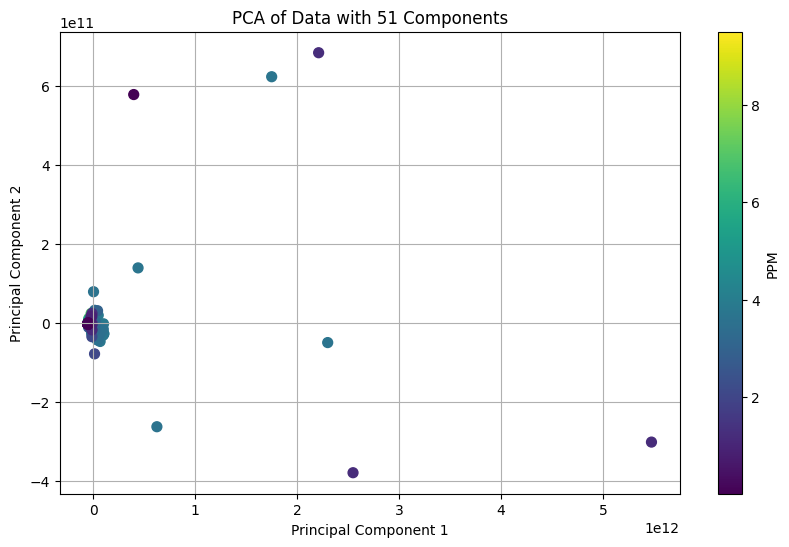

In [81]:
# prompt: ทำ PCA visualize of Data with 51 Components

# Assuming df_final is your DataFrame with 51 features (X1 to X51) and PPM

# Select only the features (X1 to X51)
X = df_final.iloc[:, :-1]

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the reduced data
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add PPM column to df_pca for color coding
df_pca['PPM'] = df_final['PPM']

# Create a scatter plot of the first two principal components, colored by PPM
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['PPM'], cmap='viridis', s=50)
plt.title('PCA of Data with 51 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='PPM')
plt.grid()
plt.show()



  การทำ PCA (Principal Component Analysis) ซึ่งบอกถึงสัดส่วนของความแปรปรวนในข้อมูลที่ถูกอธิบายโดยแต่ละ principal component (PC) ดังนี้:


>> 0.94579716 คือสัดส่วนของความแปรปรวนที่อธิบายได้โดย Principal Component 1 (PC1) ซึ่งแสดงให้เห็นว่า PC1 สามารถอธิบายความแปรปรวนในข้อมูลได้ประมาณ 94.58% ของทั้งหมด นั่นหมายความว่า PC1 มีความสำคัญมากในการจับข้อมูลและบ่งบอกถึงโครงสร้างของข้อมูล

>> 0.02860623 คือสัดส่วนของความแปรปรวนที่อธิบายได้โดย Principal Component 2 (PC2) ซึ่งสามารถอธิบายความแปรปรวนได้ประมาณ 2.86% ของทั้งหมด ทำให้ PC2 มีความสำคัญน้อยกว่า PC1 ในการจับข้อมูล


# **ข้อ 3 วิเคราะห์ว่าข้อมูลทั้ง 51 จุด มาจากสาร metabolites ทั้งหมดกี่กลุ่ม (ด้วย K-mean clustering และ Hierachical clustering)**

## **K-mean clustering**

  หาจำนวนกลุ่มที่เหมาะสม (optimal number of clusters) สำหรับการแบ่งกลุ่มข้อมูลโดยจะทำการวิเคราะห์ความสัมพันธ์ระหว่างจำนวนกลุ่ม (k) กับค่า within-cluster sum of squares (WCSS) หรือ inertia โดยการใช้วิธี Elbow Method

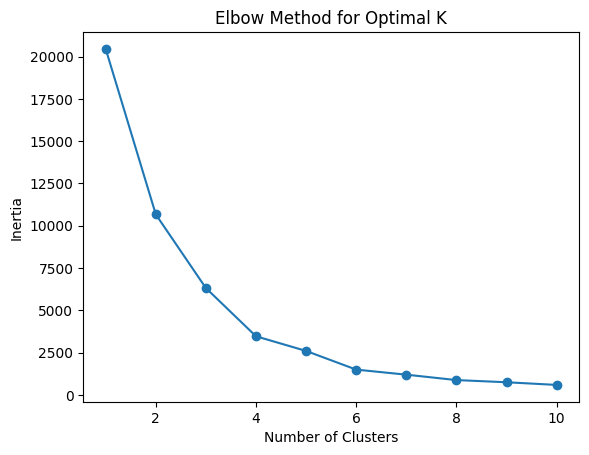

In [82]:
# prompt: # ใช้ K-Means สำหรับการแบ่งกลุ่ม

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



จุดที่เป็น elbow จะบ่งบอกถึงจำนวนกลุ่มที่เหมาะสมสำหรับข้อมูล โดยปกติแล้วเป็นจุดที่ WCSS เริ่มลดลงอย่างชัดเจน ดังนั้นมองหาจุดที่กราฟเริ่มแบน (elbow point) ซึ่งเป็นจุดที่ค่า WCSS เริ่มลดลงช้าลงเมื่อเพิ่ม k
จึงตัดสินใจเลือกจุดที่ 4


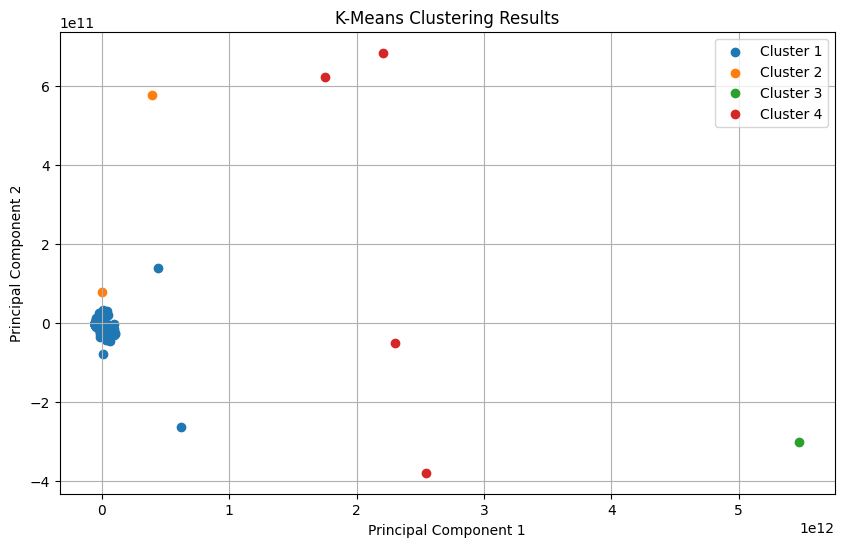

In [85]:
# Based on the elbow method, choose the optimal number of clusters (e.g., k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to df_pca for visualization
df_pca['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(df_pca[df_pca['Cluster'] == i]['Principal Component 1'],
                df_pca[df_pca['Cluster'] == i]['Principal Component 2'],
                label=f'Cluster {i+1}')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


ดังนั้นจากการทำ K-mean clustering จะสามารถแบ่งกลุ่มข้อมูลทั้ง 51 จุด ว่ามาจากสาร metabolites ทั้งหมด 4 กลุ่ม แสดงดังกราฟ

ประเมินผลการแบ่งกลุ่มด้วย Silhouette Score  ซึ่งจะช่วยบ่งชี้ว่าข้อมูลในกลุ่มที่เราสร้างขึ้นมีความเหมือนกันเพียงใดและมีความแตกต่างจากกลุ่มอื่นมากน้อยเพียงใด

In [86]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.9386463588600572


โดยค่าของ Silhouette Score = 0.9386463588600572 ซึ่งหมายความว่าการจัดกลุ่มข้อมูลของคุณมีความเหมาะสมสูง
ข้อมูลในกลุ่มเดียวกันมีความคล้ายคลึงกันมาก และมีความแตกต่างจากข้อมูลในกลุ่มอื่นอย่างชัดเจน

## **Hierachical clustering**

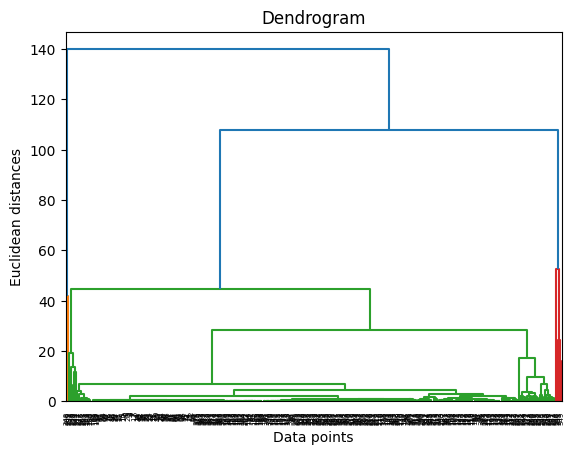

In [93]:
# prompt: # prompt: Perform PCA and segment with Hierarchical Clustering and Dendrogram.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist


# Assuming df_final is your DataFrame with 51 features (X1 to X51) and PPM

# Select only the features (X1 to X51)
X = df_final.iloc[:, :-1]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

